In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.timeseries import LombScargle

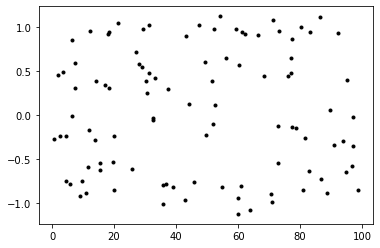

In [2]:
# let's play with a periodogram by following examples.

rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi * t) + 0.1 * rand.randn(100)

plt.plot(t, y, 'k.')

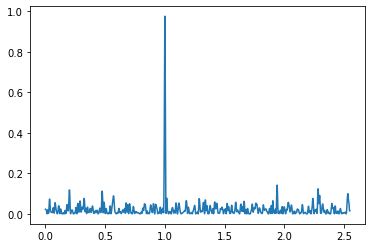

In [3]:
frequency, power = LombScargle(t, y).autopower()
plt.plot(frequency, power)  

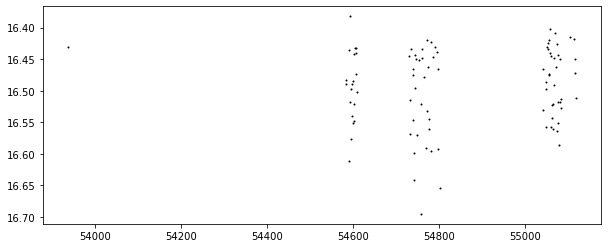

In [4]:
times = np.loadtxt("sample_k_dates.txt")
mags = np.loadtxt("sample_k_mags.txt")

plt.figure(figsize=(10,4))
plt.plot(times, mags, 'k.', ms=2)
plt.gca().invert_yaxis()

(115000, 8.475650739486549e-05, 19.493911944311666)

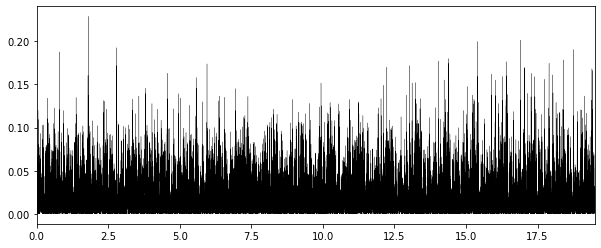

In [5]:
frequency, power = LombScargle(times, mags).autopower(nyquist_factor=500)
plt.figure(figsize=(10,4))
plt.plot(frequency, power, 'k', lw=0.25)
plt.xlim(0, np.max(frequency))

len(frequency), frequency.min(), frequency.max()  

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


(0.0, 24.0)

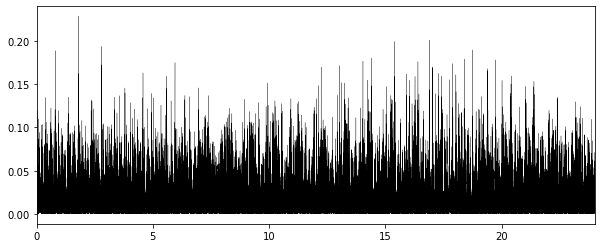

In [6]:
frequency = np.linspace(0., 24., 24*10**4)

power = LombScargle(times, mags).power(frequency)
plt.figure(figsize=(10,4))
plt.plot(frequency, power, 'k', lw=0.25)
plt.xlim(0, np.max(frequency))

1.0e-04


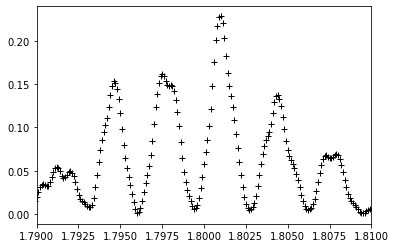

In [7]:
plt.plot(frequency, power, 'k+', lw=0.25)
plt.xlim(1.79, 1.81)

print(f"{frequency[1]-frequency[0]:.1e}")

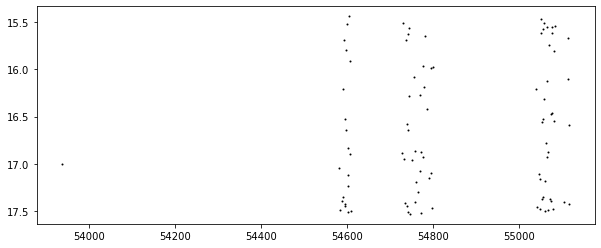

In [8]:
sin_mags = mags + np.sin(times)

plt.figure(figsize=(10,4))
plt.plot(times, sin_mags, 'k.', ms=2)
plt.gca().invert_yaxis()

(0.0, 24.0)

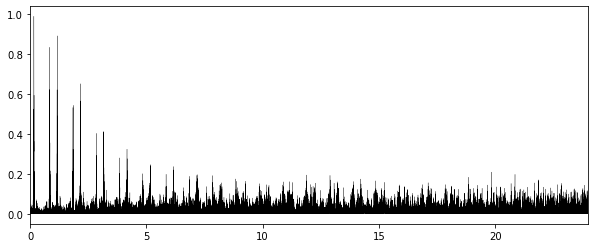

In [9]:
frequency = np.linspace(0., 24., 10**5)

power = LombScargle(times, sin_mags).power(frequency)
plt.figure(figsize=(10,4))
plt.plot(frequency, power, 'k', lw=0.25)
plt.xlim(0, np.max(frequency))

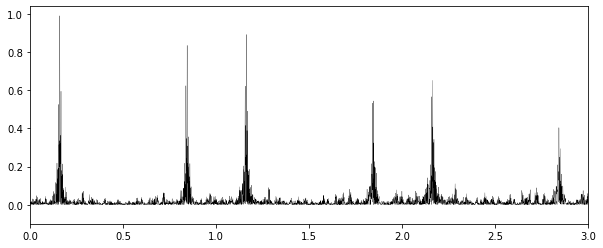

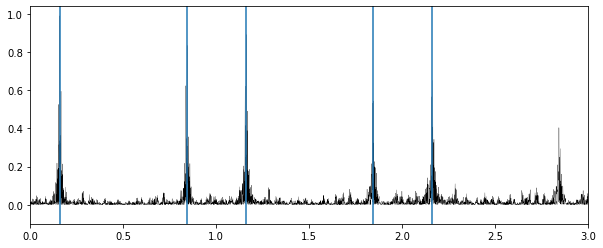

In [10]:
plt.figure(figsize=(10,4))
plt.plot(frequency, power, 'k', lw=0.25)
plt.xlim(0, 3)
plt.ylim(-0.1, None)

plt.figure(figsize=(10,4))
plt.plot(frequency, power, 'k', lw=0.25)
plt.xlim(0, 3)
plt.ylim(-0.1, None)

fm = 1/(2*np.pi)

plt.axvline(fm)

plt.axvline(1 - fm)
plt.axvline(1 + fm)

plt.axvline(2 - fm)
plt.axvline(2 + fm)


In [11]:
from wuvars.data import spreadsheet, photometry

spread = spreadsheet.load_v1()
phot = photometry.load_v1()
phot_grouped = photometry.load_v1_grouped(phot)

Loading WSERV1 photometry data... DONE (elapsed time: 4.52s)
Loading WSERV5 photometry data... DONE (elapsed time: 0.80s)
Loading WSERV7 photometry data... DONE (elapsed time: 0.75s)
Loading WSERV8 photometry data... DONE (elapsed time: 0.60s)
Loading WSERV11 photometry data... DONE (elapsed time: 2.80s)
Grouping WSERV1 photometry data... DONE (elapsed time: 36.86s)
Grouping WSERV5 photometry data... DONE (elapsed time: 3.88s)
Grouping WSERV7 photometry data... DONE (elapsed time: 3.86s)
Grouping WSERV8 photometry data... DONE (elapsed time: 2.71s)
Grouping WSERV11 photometry data... DONE (elapsed time: 4.67s)


In [12]:
from wuvars.analysis.variability_selection import sq0, sq1, sq2

our star id:  44027709754792


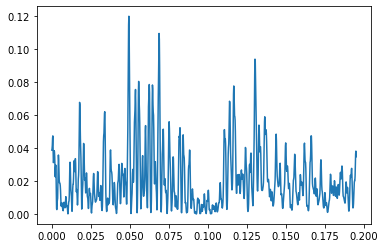

In [13]:
wserv_ids = [1, 5, 7, 8, 11]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

SFR_names = ["Cyg OB7", "Orion Nebula Cluster", "NGC 1333", "IC 348", "Mon R2"]
SFR_dict = {x: y for x, y in zip(wserv_ids, SFR_names)}

for wserv, n_min, n_max in list(zip(wserv_ids, n_min_list, n_max_list)):
    
    ds = spread[f'wserv{wserv}']
    dg = phot_grouped[f'wserv{wserv}']

    q2 = sq2(ds, n_min, n_max)
    
    # pick some star
    our_star_id = q2[q2].index[200]
    print("our star id: ", our_star_id)

    # count its J, H, K observations

#     display(ds[ds.index == our_star_id]['count'])
    
    dat = dg.groups[dg.groups.keys["SOURCEID"] == our_star_id]
    
#     plt.hist(dat['KAPERMAG3'], bins=1)
# 

    k_dates = dat['MEANMJDOBS'][~np.isnan(dat['KAPERMAG3'])]
    k_mags = dat['KAPERMAG3'][~np.isnan(dat['KAPERMAG3'])]
    
    frequency, power = LombScargle(k_dates, k_mags).autopower()

    plt.plot(frequency, power)  
    # do a lomb-scargle & plot the output
    
#     print(len(k_dates))
    
#     date_int = np.floor(k_dates)
#     date_frac = k_dates % 1
    
#     plt.figure(figsize=(15,4))
#     plt.plot(date_int, date_frac, 'k+')
#     plt.title(f"WSERV{wserv}: {SFR_dict[wserv]}")
#     plt.xlabel("MJD (integer part)")
#     plt.ylabel("MJD (fractional part)")
#     plt.grid()
#     plt.show()
    
#     display(dat)

    np.savetxt("sample_k_dates.txt", k_dates)
    np.savetxt("sample_k_mags.txt", k_mags)
    
    break


In [14]:
np.savetxt?

# Next up: we want to figure out how to compute and plot window function periodograms.

We are doing this because we trust Jake Vanderplas in his guide here: 
[Understanding the Lomb-Scargle Periodogram](https://iopscience.iop.org/article/10.3847/1538-4365/aab766#apjsaab766s8), especially the suggestions in Section 8, which I'll paste here:

-----
8.1. Summary of Recommendations

The previous pages contain a large amount of background and advice for working with the Lomb–Scargle periodogram. Following is a brief summary of the considerations to keep in mind when you apply this algorithm to a data set:

   1.  
    **Choose an appropriate frequency grid**: the minimum can be set to zero, the maximum set based on the precision of the time measurements (Section 4.1.2), and the grid spacing set based on the temporal baseline of the data (Section 7.1) so as not to sample too coarsely around peaks. If this grid size is computationally intractable, reduce the maximum frequency based on what kinds of signals you are looking for.
   2.  
    **Compute the window transform using the Lomb–Scargle periodogram**, by substituting gn = 1 for each tn and making sure not to pre-center the data or use a floating-mean model (Section 7.3.1). Examine this window function for dominant features, such as daily or annual aliases (see Figure 13) or Nyquist-like limits (see Figure 15).
   3.  
    **Compute the periodogram for your data**. You should always use the floating-mean model (Section 6.2), as it produces more robust periodograms and has few if any disadvantages. Avoid multiterm Fourier extensions (Section 6.3) when the signal has an unknown form, because its main effect is to increase periodogram noise (see  Figures 20–21).
   4.  
    **Plot the periodogram** and identify any patterns that may be caused by features you observed in the window function power. Plot reference lines showing several FAP levels to understand whether your periodogram peaks are significant enough to be labeled detections: use the Baluev method or the bootstrap method if it is computationally feasible (Section 7.4.2). Keep in mind exactly what the FAP measures and avoid the temptation to misinterpret it (Section 7.4.2.5).
   5.  
    **If the window function shows strong aliasing, locate the expected multiple maxima** and plot the phased light curve at each. If there is indication that the sinusoidal model underfits the data (see Figure 19), then consider refitting with a multiterm Fourier model (Section 6.3).
   6.  
    **If you have prior knowledge** of the shape of light curves you are trying to detect, **consider using more complex models**, such as multiterm models or physically derived templates, to choose between multiple peaks in the periodogram (Section 6.5). This type of refinement can be quite useful in building automated pipelines for period fitting, especially in cases where the window aliasing is strong.
   7.  
    **If you are building an automated pipeline** based on Lomb–Scargle for use in a survey, **consider injecting known signals** into the pipeline to measure your detection efficiency as a function of object type, brightness, and other relevant characteristics (Section 7.2)

This list is certainly not comprehensive for all uses of the periodogram, but it should serve as a brief reminder of the kinds of issues you should keep in mind when using the method to detect periodic signals.

-----

For practical advice in actually computing a window function periodogram, see this page:
https://github.com/jakevdp/PracticalLombScargle/blob/master/figures/StructuredWindows.ipynb
and ctrl-F for "fig15".